# Foundations of Data Science - Project Code
## Group Members: Valeriya, Elena, Arir


### Background
The main goal of the project is to identify if coronavirus affected customer food prices in Kyrgyzstan, which can be used to predict future prices and to inform resilience to food security issues. Also, we are going to include average monthly temperature, to see how prices change every season. 

To do the project, we used folllowing datasets

1) owid-covid-data. The dataset represents coronovirus situation in Kyrgyzstan since the beginning of the pandemic (March 2020). 

Coronavirus (COVID-19) Vaccinations. (2022, February 22). Retrieved from Our World in Data: https://ourworldindata.org/covid-vaccinations?country=KGZ

2) wpf_food_prices_kgz. The dataset shows montly custumer prices since 2016. 

Kyrgyzstan - Food Prices. (2022, February 13). Retrieved from HUMANITARIAN DATA EXCHANGE by OCHA: https://data.humdata.org/dataset/wfp-food-prices-for-kyrgyzstan?force_layout=desktop

3) 38353.01.01.2016.15.03.2022.1.0.0.ru.unic.00000000. The dataset shows weater information in Kyrgyzstan since 2016. 

Archive of weater. (2022) Retrieved from https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%91%D0%B8%D1%88%D0%BA%D0%B5%D0%BA%D0%B5

### Part 1: Wroking with row datasets.
Before loading dataset to the project, we have done some pre-processing steps using excel.
Initial dataset and cleaned dataset can be found in the project folder. 

1) In the dataset owid-covid-data the dataset contains information till March 2022. However, the food dataset contains prices till the end of 2021. So, we will remove the data starting from 2022. 
    
2) In the dataset wpf_food_prices_kgz food prices include unnecessary information, such as longtitude, lattitude, category, currency, usd price, price_flag. We removed unnecessary columns, and left only date, region, commodity and price. 
    
3) In the dataset 38353.01.01.2016.15.03.2022.1.0.0.ru.unic.00000000, we removed unnecessary columns, such as Humidity and weater. The reason for that is because we assume that prices may be different in different seasons. To merge the data with food prices, we took montly average of temperature. 

### Part 2: Load the Dataset

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 

#read data 
price_dataset = pd.read_csv('wfp_food_prices_bishkek_cleaned.csv')
covid_dataset = pd.read_csv('owid-covid-data.csv')
temperature_dataset = pd.read_csv('temperature_cleaned.csv')

#splitting price dataframe into seperate dataframes for potatoes, milk, eggs, and meat
price_dataset_potatoes = price_dataset.loc[price_dataset["commodity"]=="Potatoes"]
price_dataset_milk = price_dataset.loc[price_dataset["commodity"]=="Milk (non-pasteurized)"]
price_dataset_eggs = price_dataset.loc[price_dataset["commodity"]=="Eggs"]
price_dataset_meat = price_dataset.loc[price_dataset["commodity"]=="Meat (beef)"]

#Replacing NaN values with zeroz in covid_dataset, because at the beginning, there were 0 deaths and 0 vaccinations
covid_dataset['new_deaths'] = covid_dataset['new_deaths'].fillna(0)
covid_dataset['people_vaccinated'] = covid_dataset['people_vaccinated'].fillna(0)
print(covid_dataset)


           date  new_cases  new_deaths  people_vaccinated
0    12/31/2021         56         2.0          1231313.0
1    12/30/2021         41         1.0          1231013.0
2    12/29/2021         40         1.0          1226855.0
3    12/28/2021         46         1.0          1225902.0
4    12/27/2021          0         0.0          1220792.0
..          ...        ...         ...                ...
649   3/22/2020          0         0.0                0.0
650   3/21/2020          8         0.0                0.0
651   3/20/2020          3         0.0                0.0
652   3/19/2020          0         0.0                0.0
653   3/18/2020          3         0.0                0.0

[654 rows x 4 columns]


### Part 3: Merge covid cases, temperature and food price dataset for potatoes, milk, meat and eggs

In [128]:
dataset = price_dataset_potatoes.merge(covid_dataset, how='outer', on='date')
dataset = dataset.merge(temperature_dataset, how="outer", on="date")
#Also, we replace Nan values for new_deaths, people_vaccinated and new_cases with 0,
#because coronovirus started only in 2020

dataset['new_deaths'] = dataset['new_deaths'].fillna(0)
dataset['people_vaccinated'] = dataset['people_vaccinated'].fillna(0)
dataset['new_cases'] = dataset['new_cases'].fillna(0)
dataset = dataset.merge(temperature_dataset, how="outer", on="date")
dataset.to_csv("combined_potatoes.csv")

dataset = price_dataset_milk.merge(covid_dataset, how='outer', on='date')
dataset = dataset.merge(temperature_dataset, how="outer", on="date")
#Also, we replace Nan values for new_deaths, people_vaccinated and new_cases with 0,
#because coronovirus started only in 2020
dataset['new_deaths'] = dataset['new_deaths'].fillna(0)
dataset['people_vaccinated'] = dataset['people_vaccinated'].fillna(0)
dataset['new_cases'] = dataset['new_cases'].fillna(0)
dataset.to_csv("combined_milk.csv")

dataset = price_dataset_eggs.merge(covid_dataset, how='outer', on='date')
dataset = dataset.merge(temperature_dataset, how="outer", on="date")
#Also, we replace Nan values for new_deaths, people_vaccinated and new_cases with 0,
#because coronovirus started only in 2020
dataset['new_deaths'] = dataset['new_deaths'].fillna(0)
dataset['people_vaccinated'] = dataset['people_vaccinated'].fillna(0)
dataset['new_cases'] = dataset['new_cases'].fillna(0)
dataset.to_csv("combined_eggs.csv")

dataset = price_dataset_meat.merge(covid_dataset, how='outer', on='date')
dataset = dataset.merge(temperature_dataset, how="outer", on="date")
#Also, we replace Nan values for new_deaths, people_vaccinated and new_cases with 0,
#because coronovirus started only in 2020
dataset['new_deaths'] = dataset['new_deaths'].fillna(0)
dataset['people_vaccinated'] = dataset['people_vaccinated'].fillna(0)
dataset['new_cases'] = dataset['new_cases'].fillna(0)
dataset.to_csv("combined_meat.csv")


### Part 4: Load new dataset

After generating new datasets, rows for price for some dates were missing. Because, price dataset contains only that dates when price changes and they update the dataset every month. Therefore, using excel, we generated dummy variables for prices for dates where information was missing. The dummy price for missing dates are prices for the product for that month. For example, if price for eggs in March is 50. We duplicated that value for all dates in that month.

In [210]:
potatoes_dataset = pd.read_csv('combined_potatoes_covid_temperature.csv')
eggs_dataset = pd.read_csv('combined_eggs_covid_temperature.csv')
milk_dataset = pd.read_csv('combined_milk_covid_temperature.csv')
meat_dataset = pd.read_csv('combined_meat_covid_temperature.csv')

#renaming feature name price to target_price
potatoes_dataset.rename(columns={"price":"target_price"}, inplace=True)
eggs_dataset.rename(columns={"price":"target_price"}, inplace=True)
milk_dataset.rename(columns={"price":"target_price"}, inplace=True)
meat_dataset.rename(columns={"price":"target_price"}, inplace=True)

### Part 5: Describe datasets

In [139]:
#describe the datasets
print("Potatoes Price Temperature Covid dataset description");
print(potatoes_dataset.describe())
print("Eggs Price Temperature Covid dataset description");
print(eggs_dataset.describe())
print("Milk Price Temperature Covid dataset description");
print(milk_dataset.describe())
print("Meat Price Temperature Covid dataset description");
print(meat_dataset.describe())

Potatoes Price Temperature Covid dataset description
       target_price     new_cases   new_deaths  people_vaccinated  temperature
count   2161.000000   2161.000000  2161.000000       2.161000e+03  2161.000000
mean      25.864012     85.464600     1.296622       5.977860e+04    12.318268
std        8.504351    331.126598    18.885925       2.275677e+05    10.887391
min       13.910000      0.000000  -443.000000       0.000000e+00   -23.650000
25%       20.120000      0.000000     0.000000       0.000000e+00     3.225000
50%       25.780000      0.000000     0.000000       0.000000e+00    12.987500
75%       30.950000     34.000000     0.000000       0.000000e+00    21.787500
max       54.690000  11505.000000   727.000000       1.231313e+06    33.012500
Eggs Price Temperature Covid dataset description
       target_price     new_cases   new_deaths  people_vaccinated  temperature
count   2161.000000   2161.000000  2161.000000       2.161000e+03  2152.000000
mean      74.649149     85.46

### Part 6: Time series for features over time

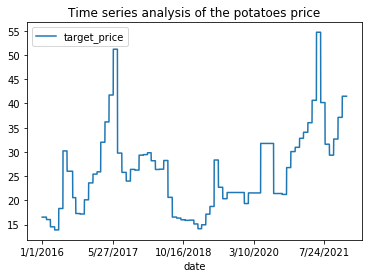

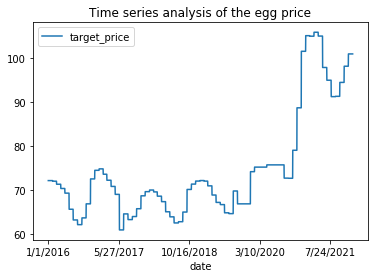

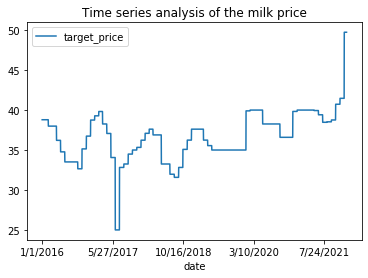

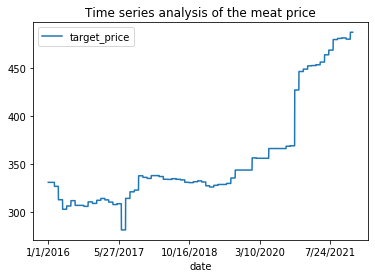

In [170]:
potatoes_dataset.plot("date", "target_price", title="Time series analysis of the potatoes price")
eggs_dataset.plot("date", "target_price", title="Time series analysis of the egg price")
milk_dataset.plot("date", "target_price", title="Time series analysis of the milk price")
meat_dataset.plot("date", "target_price", title="Time series analysis of the meat price")

As we can see from the plot, there is significant increase of price in the middle of 2020. Especially for the price of meat and eggs. As we know, the coronovirus begun in the beginning of 2020. So, we can conclude that prices were affected approximate after 6 months since the beginning of the coronovirus. Also, we can see that the price for milk and eggs are seasonal. 

### Part 7(a): Identifying correlation between each feature and target variable 

To identify correlation, we are going to use Pearson correlation. This type of correlation is going to show us the value of correlation between -1 and 1. When the correlation is close to 0, it means that correlation is weak.

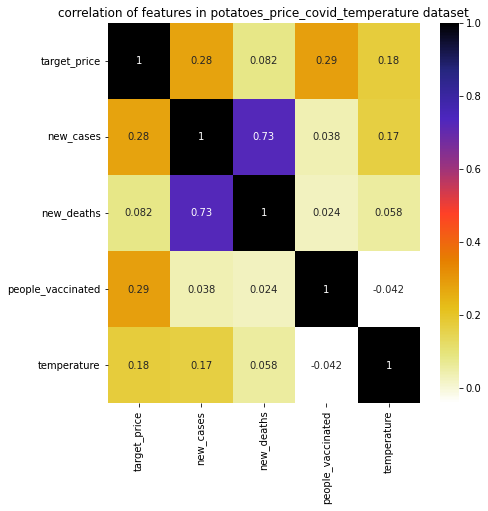

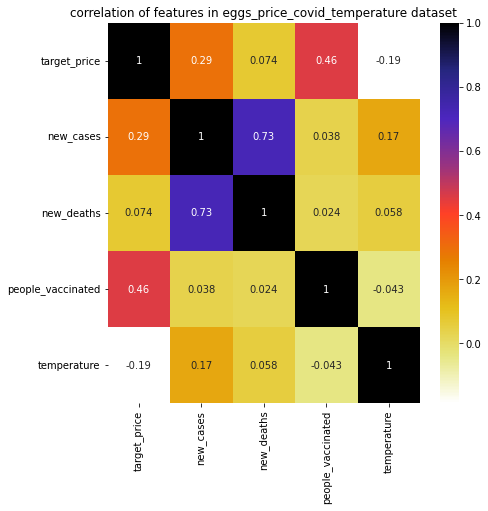

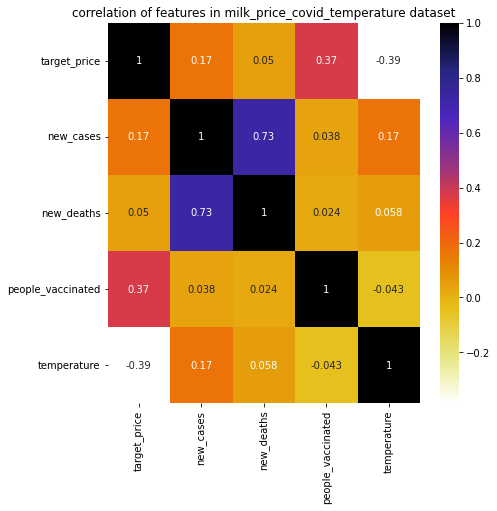

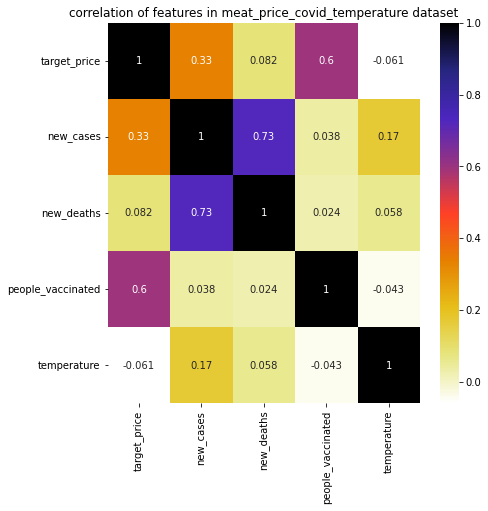

In [211]:
import seaborn as sns

plt.figure(figsize=(7,7))
plt.title("correlation of features in potatoes_price_covid_temperature dataset")
cor = potatoes_dataset.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

plt.figure(figsize=(7,7))
plt.title("correlation of features in eggs_price_covid_temperature dataset")
cor = eggs_dataset.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

plt.figure(figsize=(7,7))
plt.title("correlation of features in milk_price_covid_temperature dataset")
cor = milk_dataset.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

plt.figure(figsize=(7,7))
plt.title("correlation of features in meat_price_covid_temperature dataset")
cor = meat_dataset.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### Part 7(b). Identifying correlation between features
As we can see from the example above, new_vaccination and new_cases show the strongest correlation to target variable. However, they are still considered to be weak. Since, the absolute value of correlation is less than 0.5. The reason for that might be that from 2016 to 2020, there is no data for coronovirus cases. Therefore, in this example, we are going to identify correlation from the beginning of 2020 to 2021.

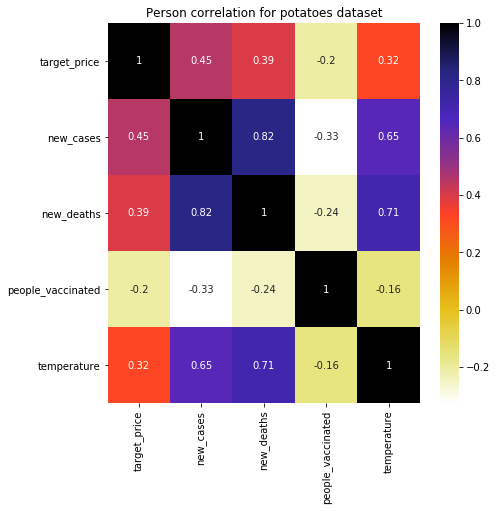

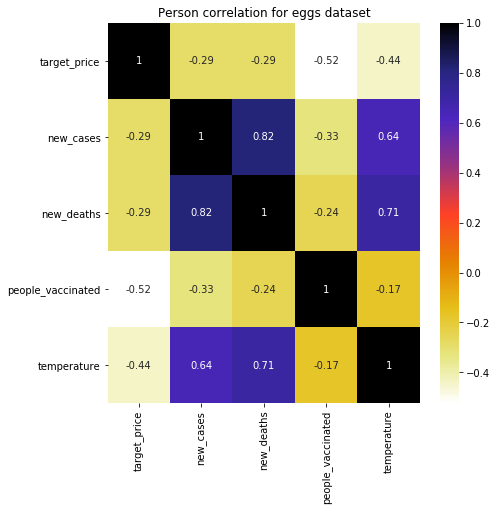

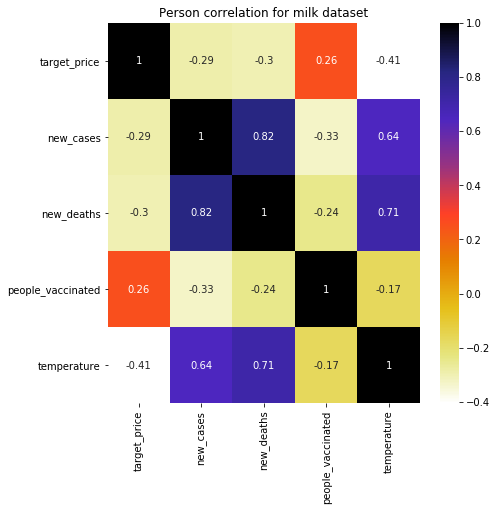

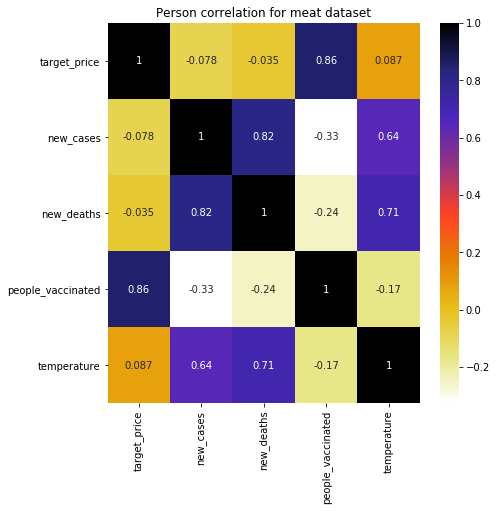

In [133]:
potatoes_dataset_recent = potatoes_dataset.loc[pd.DatetimeIndex(potatoes_dataset['date']).year>2020]
eggs_dataset_recent = eggs_dataset.loc[pd.DatetimeIndex(eggs_dataset['date']).year>2020]
milk_dataset_recent = milk_dataset.loc[pd.DatetimeIndex(milk_dataset['date']).year>2020]
meat_dataset_recent = meat_dataset.loc[pd.DatetimeIndex(meat_dataset['date']).year>2020]

plt.figure(figsize=(7,7))
plt.title("Person correlation for potatoes dataset")
cor = potatoes_dataset_recent.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

plt.figure(figsize=(7,7))
plt.title("Person correlation for eggs dataset")
cor = eggs_dataset_recent.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

plt.figure(figsize=(7,7))
plt.title("Person correlation for milk dataset")
cor = milk_dataset_recent.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

plt.figure(figsize=(7,7))
plt.title("Person correlation for meat dataset")
cor = meat_dataset_recent.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

As we can see from the correlation. The strongest correlation features with target_price for potatoes are new_cases and new_death.
While for milk, eggs and meat. The strongest correlation was with new_vaccinated feature.


### Part 8: Multivariate Time Series Forecasting Using LSTM to predict potatoes prices


Load necessary libraries and use MinMaxScaler to scale down the values. Also, we are going to convert series to supervised model

In [189]:
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score

# Retrieved from: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/ 
#Code to concert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

#load dataset in a new format 
potatoes_dataset_lstm= pd.read_csv('combined_potatoes_covid_temperature.csv', infer_datetime_format=True, 
                 low_memory=False, index_col='date')

#select values from the dataframe
values = potatoes_dataset_lstm.values

#use scaler to scale values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8, 9]], axis=1, inplace=True)


values = reframed.values
print(reframed)
n_train_time = 365*5
train = values[:n_train_time, :]
test = values[n_train_time:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
 


      var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1      0.064738   0.000000   0.378632   0.000000   0.547981  0.064738
2      0.064738   0.000000   0.378632   0.000000   0.515994  0.064738
3      0.064738   0.000000   0.378632   0.000000   0.420031  0.064738
4      0.064738   0.000000   0.378632   0.000000   0.412310  0.064738
5      0.064738   0.000000   0.378632   0.000000   0.443194  0.064738
...         ...        ...        ...        ...        ...       ...
2156   0.676312   0.005824   0.382906   0.987649   0.446283  0.676312
2157   0.676312   0.000000   0.378632   0.991455   0.394220  0.676312
2158   0.676312   0.003998   0.379487   0.995606   0.393117  0.676312
2159   0.676312   0.003477   0.379487   0.996379   0.406795  0.676312
2160   0.676312   0.003564   0.379487   0.999756   0.372822  0.676312

[2160 rows x 6 columns]
(1825, 1, 5) (1825,) (335, 1, 5) (335,)


### Creating LSTM Model

Epoch 1/20
27/27 - 1s - loss: 0.0695 - val_loss: 0.1940 - 635ms/epoch - 24ms/step
Epoch 2/20
27/27 - 1s - loss: 0.0286 - val_loss: 0.1044 - 635ms/epoch - 24ms/step
Epoch 3/20
27/27 - 1s - loss: 0.0242 - val_loss: 0.0889 - 782ms/epoch - 29ms/step
Epoch 4/20
27/27 - 1s - loss: 0.0224 - val_loss: 0.0842 - 547ms/epoch - 20ms/step
Epoch 5/20
27/27 - 1s - loss: 0.0203 - val_loss: 0.0761 - 554ms/epoch - 21ms/step
Epoch 6/20
27/27 - 1s - loss: 0.0184 - val_loss: 0.0665 - 581ms/epoch - 22ms/step
Epoch 7/20
27/27 - 1s - loss: 0.0164 - val_loss: 0.0583 - 724ms/epoch - 27ms/step
Epoch 8/20
27/27 - 1s - loss: 0.0144 - val_loss: 0.0498 - 579ms/epoch - 21ms/step
Epoch 9/20
27/27 - 1s - loss: 0.0125 - val_loss: 0.0414 - 559ms/epoch - 21ms/step
Epoch 10/20
27/27 - 1s - loss: 0.0108 - val_loss: 0.0338 - 547ms/epoch - 20ms/step
Epoch 11/20
27/27 - 1s - loss: 0.0088 - val_loss: 0.0261 - 554ms/epoch - 21ms/step
Epoch 12/20
27/27 - 1s - loss: 0.0070 - val_loss: 0.0194 - 617ms/epoch - 23ms/step
Epoch 13/20
2

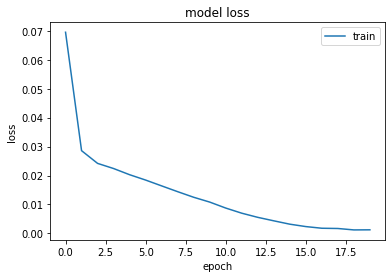

In [190]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', run_eagerly=True)

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Make prediction

In [191]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 5))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.541


### plot predicted and actual values

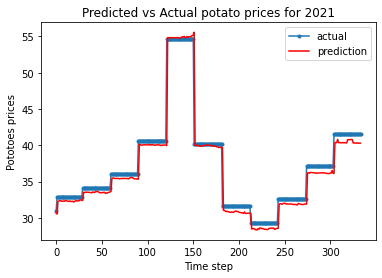

In [193]:
aa=[x for x in range(334)]
plt.plot(aa, inv_y[:334], marker='.', label="actual")
plt.plot(aa, inv_yhat[:334], 'r', label="prediction")
plt.ylabel('Pototoes prices')
plt.xlabel('Time step')
plt.legend(fontsize=10)
plt.title("Predicted vs Actual potato prices for 2021")
plt.show()

### Multivariate Time Series Forecasting Using LSTM to predict eggs prices

In [194]:

#load dataset in a new format 
potatoes_dataset_lstm= pd.read_csv('combined_eggs_covid_temperature.csv', infer_datetime_format=True, 
                 low_memory=False, index_col='date')

#select values from the dataframe
values = potatoes_dataset_lstm.values

#use scaler to scale values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)


values = reframed.values
print(reframed)
n_train_time = 365*5
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
 

      var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1      0.249556   0.000000   0.378632   0.000000   0.547981  0.249556
2      0.249556   0.000000   0.378632   0.000000   0.515994  0.249556
3      0.249556   0.000000   0.378632   0.000000   0.420031  0.249556
4      0.249556   0.000000   0.378632   0.000000   0.412310  0.249556
5      0.249556   0.000000   0.378632   0.000000   0.443194  0.249556
...         ...        ...        ...        ...        ...       ...
2156   0.890320   0.005824   0.382906   0.987649   0.446283  0.890320
2157   0.890320   0.000000   0.378632   0.991455   0.394220  0.890320
2158   0.890320   0.003998   0.379487   0.995606   0.393117  0.890320
2159   0.890320   0.003477   0.379487   0.996379   0.406795  0.890320
2160   0.890320   0.003564   0.379487   0.999756   0.372822  0.890320

[2142 rows x 6 columns]
(1825, 1, 5) (1825,) (317, 1, 5) (317,)


### Training data

Epoch 1/40
27/27 - 1s - loss: 4.8791e-04 - val_loss: 3.6758e-04 - 625ms/epoch - 23ms/step
Epoch 2/40
27/27 - 1s - loss: 4.9518e-04 - val_loss: 3.6823e-04 - 553ms/epoch - 20ms/step
Epoch 3/40
27/27 - 1s - loss: 5.0137e-04 - val_loss: 3.6535e-04 - 648ms/epoch - 24ms/step
Epoch 4/40
27/27 - 1s - loss: 4.6553e-04 - val_loss: 4.8992e-04 - 566ms/epoch - 21ms/step
Epoch 5/40
27/27 - 1s - loss: 4.7076e-04 - val_loss: 4.0325e-04 - 560ms/epoch - 21ms/step
Epoch 6/40
27/27 - 1s - loss: 4.5694e-04 - val_loss: 4.1139e-04 - 677ms/epoch - 25ms/step
Epoch 7/40
27/27 - 1s - loss: 5.5643e-04 - val_loss: 3.7428e-04 - 564ms/epoch - 21ms/step
Epoch 8/40
27/27 - 1s - loss: 4.5460e-04 - val_loss: 3.8209e-04 - 666ms/epoch - 25ms/step
Epoch 9/40
27/27 - 1s - loss: 4.2315e-04 - val_loss: 4.0312e-04 - 554ms/epoch - 21ms/step
Epoch 10/40
27/27 - 1s - loss: 4.4562e-04 - val_loss: 3.7723e-04 - 644ms/epoch - 24ms/step
Epoch 11/40
27/27 - 1s - loss: 5.1045e-04 - val_loss: 4.1343e-04 - 562ms/epoch - 21ms/step
Epoch 12

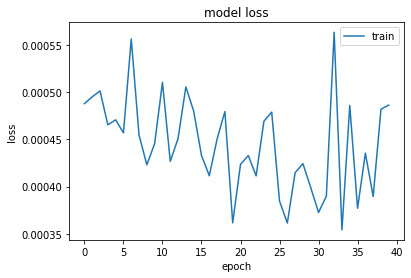

In [196]:
# fit network
history = model.fit(train_X, train_y, epochs=40, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Make prediction

In [197]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 5))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.269


### plot predicted and actual values

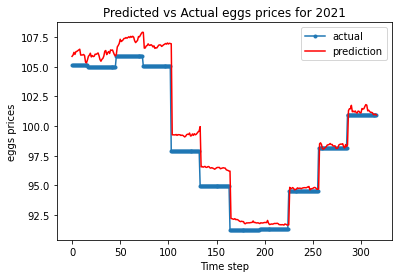

In [199]:
aa=[x for x in range(317)]
plt.plot(aa, inv_y[:317], marker='.', label="actual")
plt.plot(aa, inv_yhat[:317], 'r', label="prediction")
plt.ylabel('eggs prices')
plt.xlabel('Time step')
plt.legend(fontsize=10)
plt.title("Predicted vs Actual eggs prices for 2021")
plt.show()

### Multivariate Time Series Forecasting Using LSTM to predict milk prices

In [200]:

#load dataset in a new format 
potatoes_dataset_lstm= pd.read_csv('combined_milk_covid_temperature.csv', infer_datetime_format=True, 
                 low_memory=False, index_col='date')

#select values from the dataframe
values = potatoes_dataset_lstm.values

#use scaler to scale values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)


# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)


values = reframed.values
print(reframed.head())
n_train_time = 365*5
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
 

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.557397        0.0   0.378632        0.0   0.547981  0.557397
2   0.557397        0.0   0.378632        0.0   0.515994  0.557397
3   0.557397        0.0   0.378632        0.0   0.420031  0.557397
4   0.557397        0.0   0.378632        0.0   0.412310  0.557397
5   0.557397        0.0   0.378632        0.0   0.443194  0.557397
(1825, 1, 5) (1825,) (317, 1, 5) (317,)


### Training data

Epoch 1/40
27/27 - 1s - loss: 8.2821e-04 - val_loss: 4.6063e-04 - 664ms/epoch - 25ms/step
Epoch 2/40
27/27 - 1s - loss: 8.2061e-04 - val_loss: 5.2600e-04 - 569ms/epoch - 21ms/step
Epoch 3/40
27/27 - 1s - loss: 8.9275e-04 - val_loss: 4.5322e-04 - 541ms/epoch - 20ms/step
Epoch 4/40
27/27 - 1s - loss: 8.3744e-04 - val_loss: 4.1628e-04 - 597ms/epoch - 22ms/step
Epoch 5/40
27/27 - 1s - loss: 8.1933e-04 - val_loss: 4.3578e-04 - 579ms/epoch - 21ms/step
Epoch 6/40
27/27 - 1s - loss: 8.1657e-04 - val_loss: 4.1184e-04 - 570ms/epoch - 21ms/step
Epoch 7/40
27/27 - 1s - loss: 8.1389e-04 - val_loss: 4.2936e-04 - 666ms/epoch - 25ms/step
Epoch 8/40
27/27 - 1s - loss: 7.3375e-04 - val_loss: 4.5194e-04 - 552ms/epoch - 20ms/step
Epoch 9/40
27/27 - 1s - loss: 7.8553e-04 - val_loss: 4.3577e-04 - 851ms/epoch - 32ms/step
Epoch 10/40
27/27 - 1s - loss: 7.4851e-04 - val_loss: 4.2005e-04 - 735ms/epoch - 27ms/step
Epoch 11/40
27/27 - 1s - loss: 7.6828e-04 - val_loss: 4.2379e-04 - 612ms/epoch - 23ms/step
Epoch 12

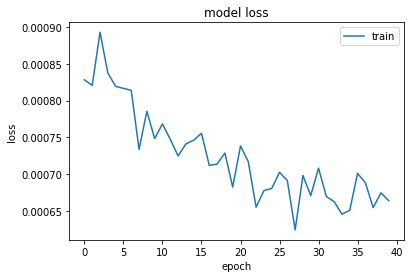

In [201]:
# fit network
history = model.fit(train_X, train_y, epochs=40, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Make prediction¶

In [202]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 5))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.498


### plot predicted and actual values

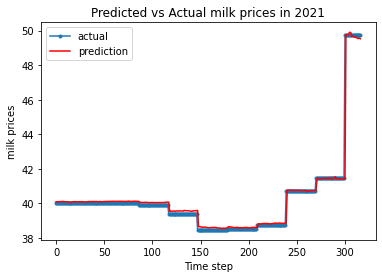

In [204]:
aa=[x for x in range(317)]
plt.plot(aa, inv_y[:317], marker='.', label="actual")
plt.plot(aa, inv_yhat[:317], 'r', label="prediction")
plt.ylabel('milk prices')
plt.xlabel('Time step')
plt.legend(fontsize=10)
plt.title("Predicted vs Actual milk prices in 2021")
plt.show()

### Multivariate Time Series Forecasting Using LSTM to predict meat prices

In [205]:

#load dataset in a new format 
potatoes_dataset_lstm= pd.read_csv('combined_meat_covid_temperature.csv', infer_datetime_format=True, 
                 low_memory=False, index_col='date')

#select values from the dataframe
values = potatoes_dataset_lstm.values

#use scaler to scale values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)


# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)


values = reframed.values
print(reframed.head())
n_train_time = 365*5
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
 

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.240577        0.0   0.378632        0.0   0.547981  0.240577
2   0.240577        0.0   0.378632        0.0   0.515994  0.240577
3   0.240577        0.0   0.378632        0.0   0.420031  0.240577
4   0.240577        0.0   0.378632        0.0   0.412310  0.240577
5   0.240577        0.0   0.378632        0.0   0.443194  0.240577
(1825, 1, 5) (1825,) (317, 1, 5) (317,)


In [118]:
### Training data

Epoch 1/20
27/27 - 1s - loss: 5.3490e-04 - val_loss: 6.5628e-05 - 653ms/epoch - 24ms/step
Epoch 2/20
27/27 - 1s - loss: 4.0400e-04 - val_loss: 2.1653e-04 - 673ms/epoch - 25ms/step
Epoch 3/20
27/27 - 1s - loss: 3.2740e-04 - val_loss: 3.0069e-04 - 557ms/epoch - 21ms/step
Epoch 4/20
27/27 - 1s - loss: 4.1603e-04 - val_loss: 4.4286e-04 - 544ms/epoch - 20ms/step
Epoch 5/20
27/27 - 1s - loss: 3.1548e-04 - val_loss: 5.7160e-04 - 540ms/epoch - 20ms/step
Epoch 6/20
27/27 - 1s - loss: 3.1168e-04 - val_loss: 2.6789e-04 - 539ms/epoch - 20ms/step
Epoch 7/20
27/27 - 1s - loss: 3.6433e-04 - val_loss: 3.2410e-04 - 552ms/epoch - 20ms/step
Epoch 8/20
27/27 - 1s - loss: 2.8116e-04 - val_loss: 3.8220e-04 - 538ms/epoch - 20ms/step
Epoch 9/20
27/27 - 1s - loss: 3.0342e-04 - val_loss: 3.7311e-04 - 637ms/epoch - 24ms/step
Epoch 10/20
27/27 - 1s - loss: 3.2173e-04 - val_loss: 1.5806e-04 - 726ms/epoch - 27ms/step
Epoch 11/20
27/27 - 1s - loss: 3.2348e-04 - val_loss: 2.6826e-04 - 552ms/epoch - 20ms/step
Epoch 12

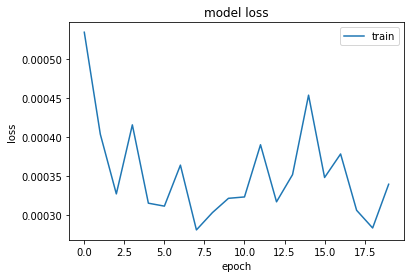

In [206]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Make prediction¶

In [207]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 5))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.880


### plot predicted and actual values

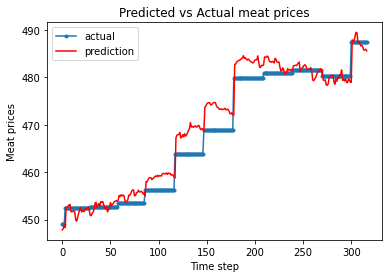

In [208]:
aa=[x for x in range(317)]
plt.plot(aa, inv_y[:317], marker='.', label="actual")
plt.plot(aa, inv_yhat[:317], 'r', label="prediction")
plt.ylabel('Meat prices')
plt.xlabel('Time step')
plt.legend(fontsize=10)
plt.title("Predicted vs Actual meat prices")
plt.show()

To conclude, the model evaluated 